In [1]:
import numpy as np
import pandas as pd
import scipy

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.preprocessing import StandardScaler

from scipy.cluster.hierarchy import dendrogram,linkage

from sklearn.cluster import KMeans

from sklearn.decomposition import PCA

import pickle

In [2]:
customer_data = pd.read_csv("segmentation data.csv",index_col=0)

In [3]:
customer_data

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
100000001,0,0,67,2,124670,1,2
100000002,1,1,22,1,150773,1,2
100000003,0,0,49,1,89210,0,0
100000004,0,0,45,1,171565,1,1
100000005,0,0,53,1,149031,1,1
...,...,...,...,...,...,...,...
100001996,1,0,47,1,123525,0,0
100001997,1,1,27,1,117744,1,0
100001998,0,0,31,0,86400,0,0


In [4]:
customer_data.iloc[:,2]

ID
100000001    67
100000002    22
100000003    49
100000004    45
100000005    53
             ..
100001996    47
100001997    27
100001998    31
100001999    24
100002000    25
Name: Age, Length: 2000, dtype: int64

In [5]:
customer_data.describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


In [6]:
customer_data.corr()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Sex,1.000000,0.566511,-0.182885,0.244838,-0.195146,-0.202491,-0.300803
Marital status,0.566511,1.000000,-0.213178,0.374017,-0.073528,-0.029490,-0.097041
Age,-0.182885,-0.213178,1.000000,0.654605,0.340610,0.108388,0.119751
Education,0.244838,0.374017,0.654605,1.000000,0.233459,0.064524,0.034732
Income,-0.195146,-0.073528,0.340610,0.233459,1.000000,0.680357,0.490881
Occupation,-0.202491,-0.029490,0.108388,0.064524,0.680357,1.000000,0.571795
Settlement size,-0.300803,-0.097041,0.119751,0.034732,0.490881,0.571795,1.000000


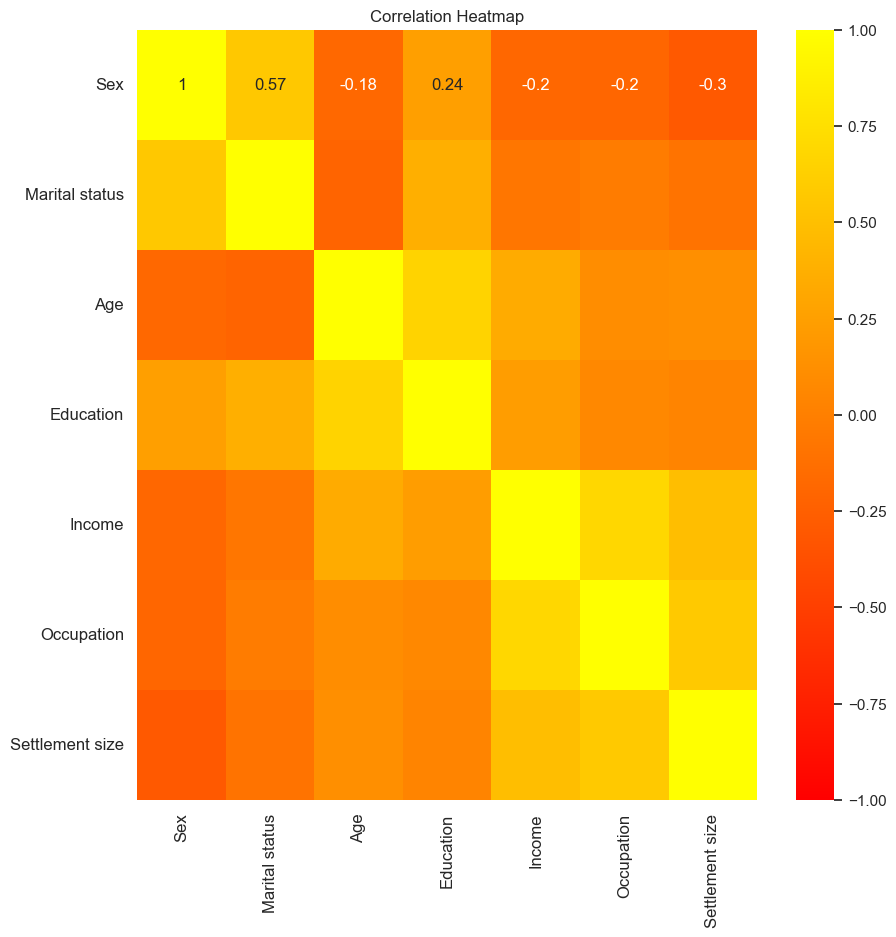

In [7]:
plt.figure(figsize=(10,10))
s = sns.heatmap(customer_data.corr(),
                annot=True,
                cmap="autumn",
                vmin=-1,
                vmax=1)
s.set_yticklabels(s.get_yticklabels(),rotation=0,fontsize=12)
s.set_xticklabels(s.get_xticklabels(),rotation=90,fontsize=12)
plt.title("Correlation Heatmap")
plt.show()

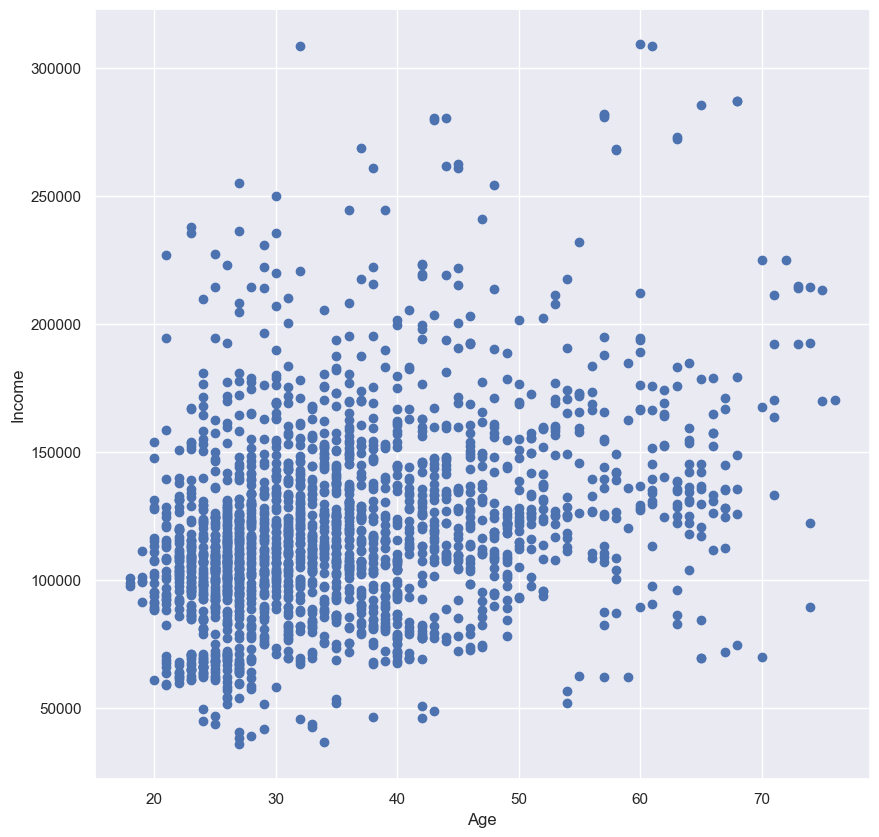

In [8]:
plt.figure(figsize=(10,10))
plt.scatter(customer_data.iloc[:,2],customer_data.iloc[:,4])
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

In [9]:
scaler = StandardScaler()
customer_data_std = scaler.fit_transform(customer_data)

In [10]:
hier_cluster = linkage(customer_data_std,method='ward')

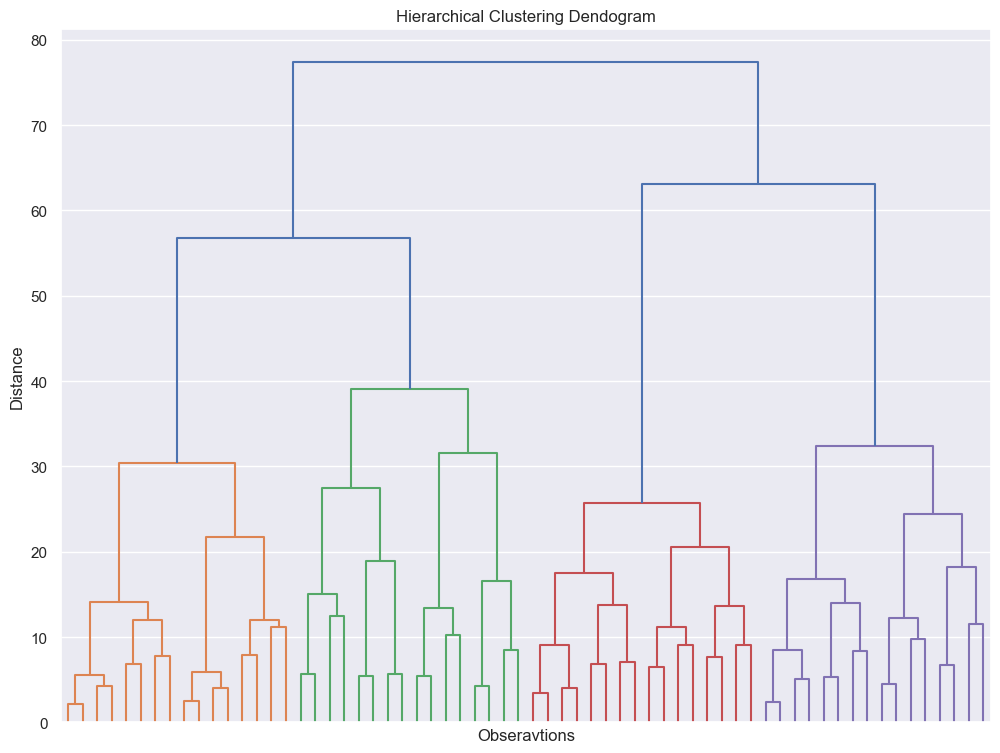

In [11]:
plt.figure(figsize=(12,9))
plt.title("Hierarchical Clustering Dendogram")
plt.xlabel("Obseravtions")
plt.ylabel('Distance')
dendrogram(hier_cluster,
           truncate_mode="level",
           p=5,
           show_leaf_counts=False,
          no_labels=True)
plt.show()

In [12]:
#within cluster squared sum
wcss=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, n_init=10,init = 'k-means++', random_state=42)
    kmeans.fit(customer_data_std)
    wcss.append(kmeans.inertia_)

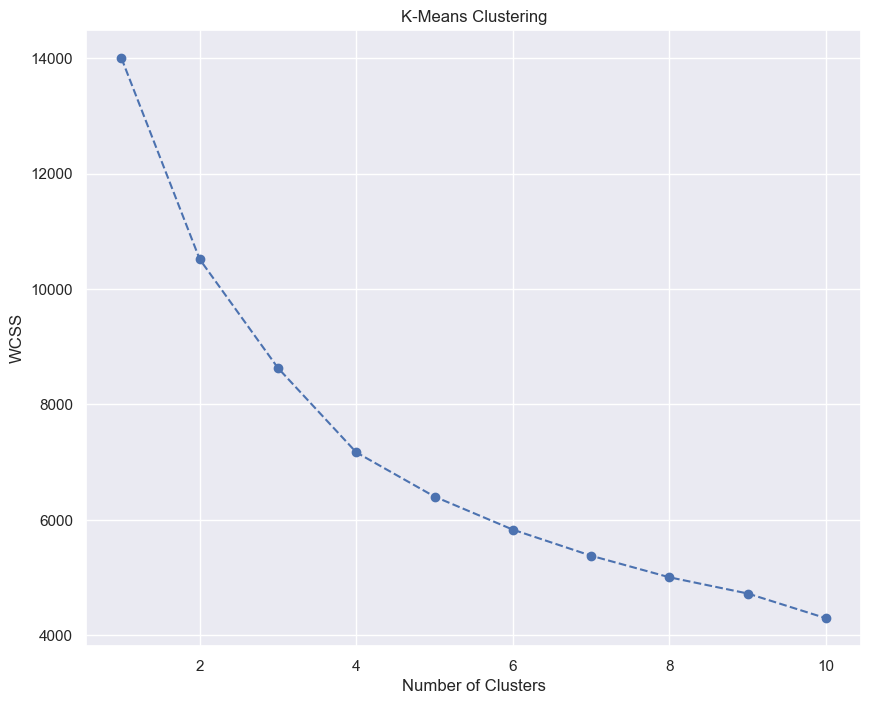

In [13]:
plt.figure(figsize=(10,8))
plt.plot(range(1,11),wcss,marker='o',linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title("K-Means Clustering")
plt.show()

In [14]:
kmeans = KMeans(n_clusters=4,init='k-means++',n_init=10 ,random_state=42)
kmeans.fit(customer_data_std)

KMeans(n_clusters=4, n_init=10, random_state=42)

In [15]:
customer_data_cluster = customer_data.copy()
customer_data_cluster['Segment K-means'] = kmeans.labels_

In [16]:
customer_data_cluster_analysis = customer_data_cluster.groupby(['Segment K-means']).mean()
customer_data_cluster_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Segment K-means,,,,,,,
0,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266
1,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290
2,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695
3,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807


In [17]:
customer_data_cluster_analysis['Num Of Objs'] = customer_data_cluster[['Segment K-means','Sex']].groupby(['Segment K-means']).count()

In [18]:
customer_data_cluster_analysis['Prop Objs']=customer_data_cluster_analysis['Num Of Objs']/customer_data_cluster_analysis['Num Of Objs'].sum()

In [19]:
customer_data_cluster_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Num Of Objs,Prop Objs
Segment K-means,,,,,,,,,
0,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266,263,0.1315
1,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290,462,0.2310
2,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695,705,0.3525
3,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807,570,0.2850


In [20]:
customer_data_cluster_analysis.rename({0:'well-off',
                         1:'fewer-opportunities',
                         2:'standard',
                         3:'career focused'})

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Num Of Objs,Prop Objs
Segment K-means,,,,,,,,,
well-off,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266,263,0.1315
fewer-opportunities,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290,462,0.2310
standard,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695,705,0.3525
career focused,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807,570,0.2850


In [21]:
customer_data_cluster['Labels'] = customer_data_cluster['Segment K-means'].map({0:'well-off', 
                                                                  1:'fewer opportunities',
                                                                  2:'standard', 
                                                                  3:'career focused'})

In [22]:
customer_data_cluster

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment K-means,Labels
ID,,,,,,,,,
100000001,0,0,67,2,124670,1,2,0,well-off
100000002,1,1,22,1,150773,1,2,2,standard
100000003,0,0,49,1,89210,0,0,1,fewer opportunities
100000004,0,0,45,1,171565,1,1,3,career focused
100000005,0,0,53,1,149031,1,1,3,career focused
...,...,...,...,...,...,...,...,...,...
100001996,1,0,47,1,123525,0,0,1,fewer opportunities
100001997,1,1,27,1,117744,1,0,2,standard
100001998,0,0,31,0,86400,0,0,1,fewer opportunities


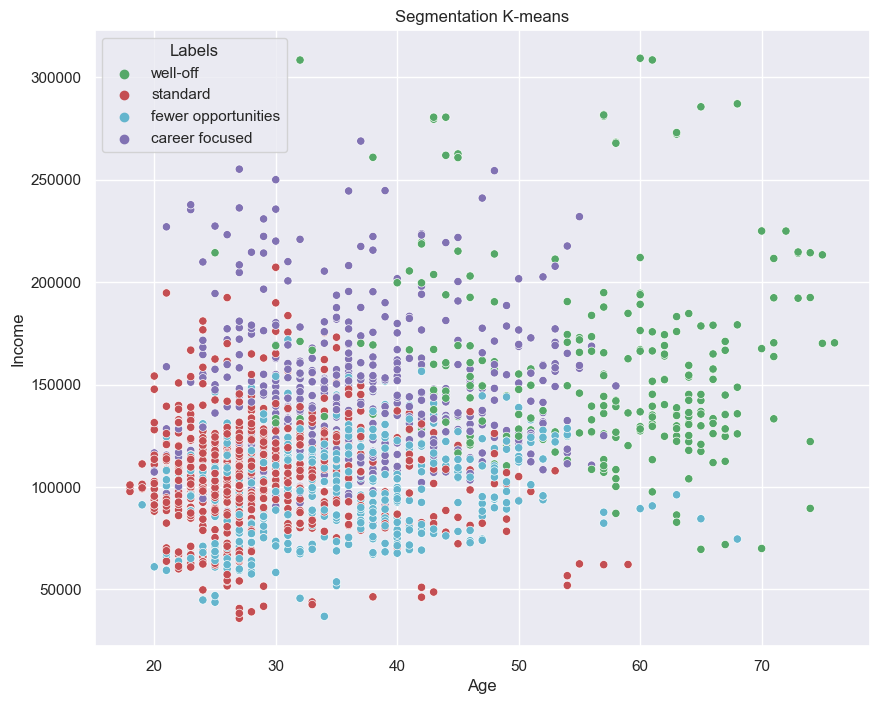

In [23]:
x_axis = customer_data_cluster['Age']
y_axis = customer_data_cluster['Income']
plt.figure(figsize = (10, 8))
sns.scatterplot(x=x_axis, y=y_axis,hue = customer_data_cluster['Labels'], palette = ['g', 'r', 'c', 'm'])
plt.title('Segmentation K-means')
plt.show()

PCA

In [24]:
pca=PCA()

In [25]:
pca.fit(customer_data_std)

PCA()

In [26]:
pca.explained_variance_ratio_

array([0.35696328, 0.26250923, 0.18821114, 0.0755775 , 0.05716512,
       0.03954794, 0.02002579])

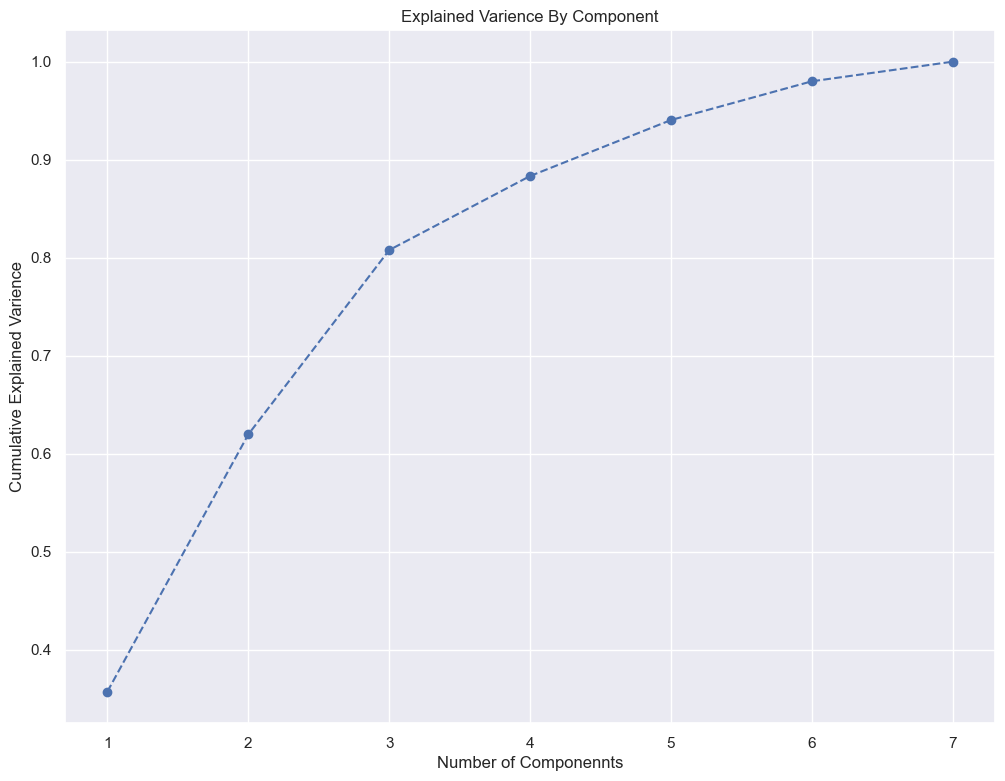

In [27]:
plt.figure(figsize=(12,9))
plt.plot(range(1,8),pca.explained_variance_ratio_.cumsum(),marker='o',linestyle='--')
plt.title("Explained Varience By Component")
plt.xlabel('Number of Componennts')
plt.ylabel('Cumulative Explained Varience')
plt.show()

In [28]:
pca=PCA(n_components=3)

In [29]:
pca.fit(customer_data_std)

PCA(n_components=3)

In [30]:
customer_data_pca=pca.transform(customer_data_std)

In [31]:
wcss=[]
for i in range(1,11):
    kmeans_pca = KMeans(n_clusters=i,init='k-means++',n_init=10,random_state=42)
    kmeans_pca.fit(customer_data_pca)
    wcss.append(kmeans_pca.inertia_)

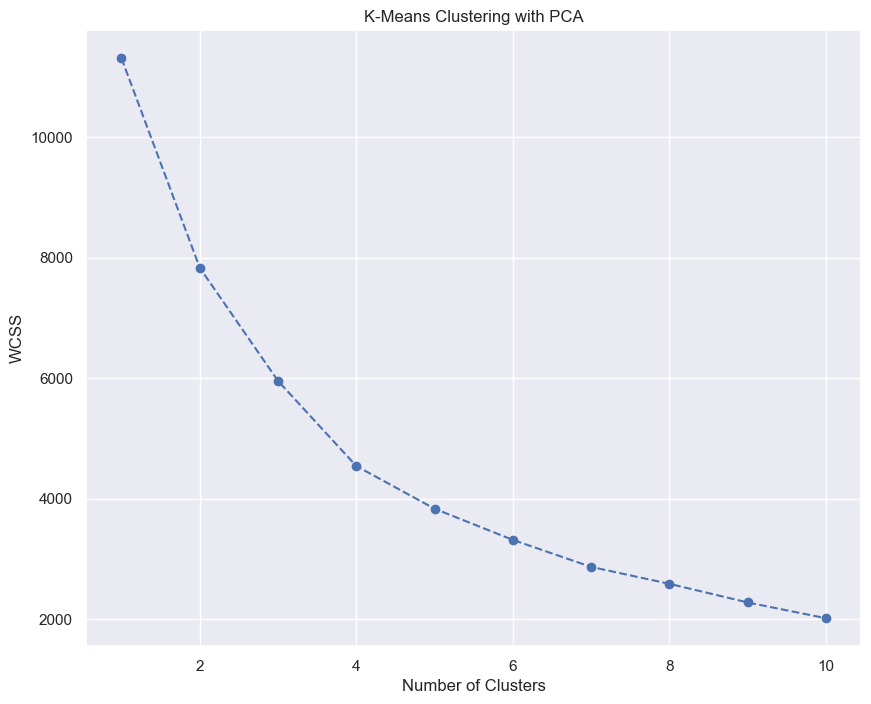

In [32]:
plt.figure(figsize=(10,8))
plt.plot(range(1,11),wcss,marker='o',linestyle='--')
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("K-Means Clustering with PCA")
plt.show()

In [33]:
kmeans_pca = KMeans(n_clusters=4,init='k-means++',n_init=10 ,random_state=42)
kmeans_pca.fit(customer_data_pca)

KMeans(n_clusters=4, n_init=10, random_state=42)

In [34]:
customer_data_cluster_pca = pd.concat([customer_data.reset_index(drop=True),pd.DataFrame(customer_data_pca)],axis=1)
customer_data_cluster_pca.columns.values[-3:]=['Component 1','Component 2','Component 3']
customer_data_cluster_pca['Segment K-means PCA']=kmeans_pca.labels_
customer_data_cluster_pca

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3,Segment K-means PCA
0,0,0,67,2,124670,1,2,2.514746,0.834122,2.174806,3
1,1,1,22,1,150773,1,2,0.344935,0.598146,-2.211603,0
2,0,0,49,1,89210,0,0,-0.651063,-0.680093,2.280419,2
3,0,0,45,1,171565,1,1,1.714316,-0.579927,0.730731,1
4,0,0,53,1,149031,1,1,1.626745,-0.440496,1.244909,1
...,...,...,...,...,...,...,...,...,...,...,...
1995,1,0,47,1,123525,0,0,-0.866034,0.298330,1.438958,2
1996,1,1,27,1,117744,1,0,-1.114957,0.794727,-1.079871,0
1997,0,0,31,0,86400,0,0,-1.452298,-2.235937,0.896571,2
1998,1,1,24,1,97968,0,0,-2.241453,0.627108,-0.530456,0


In [35]:
customer_data_cluster_pca_analysis = customer_data_cluster_pca.groupby(['Segment K-means PCA']).mean()
customer_data_cluster_pca_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3
Segment K-means PCA,,,,,,,,,,
0,0.900289,0.965318,28.878613,1.060694,107551.500000,0.677746,0.440751,-1.107019,0.703776,-0.781410
1,0.027444,0.168096,35.737564,0.734134,141525.826758,1.267581,1.480274,1.372663,-1.046172,-0.248046
2,0.306522,0.095652,35.313043,0.760870,93692.567391,0.252174,0.039130,-1.046406,-0.902963,1.003644
3,0.505660,0.690566,55.679245,2.128302,158019.101887,1.120755,1.101887,1.687328,2.031200,0.844039


In [36]:
customer_data_cluster_pca_analysis['Num Of Objs'] = customer_data_cluster_pca[['Segment K-means PCA','Sex']].groupby(['Segment K-means PCA']).count()

In [37]:
customer_data_cluster_pca_analysis['Prop Of Objs'] = customer_data_cluster_pca_analysis['Num Of Objs']/customer_data_cluster_pca_analysis['Num Of Objs'].sum()
customer_data_cluster_pca_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3,Num Of Objs,Prop Of Objs
Segment K-means PCA,,,,,,,,,,,,
0,0.900289,0.965318,28.878613,1.060694,107551.500000,0.677746,0.440751,-1.107019,0.703776,-0.781410,692,0.3460
1,0.027444,0.168096,35.737564,0.734134,141525.826758,1.267581,1.480274,1.372663,-1.046172,-0.248046,583,0.2915
2,0.306522,0.095652,35.313043,0.760870,93692.567391,0.252174,0.039130,-1.046406,-0.902963,1.003644,460,0.2300
3,0.505660,0.690566,55.679245,2.128302,158019.101887,1.120755,1.101887,1.687328,2.031200,0.844039,265,0.1325


In [38]:
customer_data_cluster_pca_analysis.rename({0:'standard',
                                           1:'career focused',
                                           2:'fewer opportunities', 
                                           3:'well-off'})

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3,Num Of Objs,Prop Of Objs
Segment K-means PCA,,,,,,,,,,,,
standard,0.900289,0.965318,28.878613,1.060694,107551.500000,0.677746,0.440751,-1.107019,0.703776,-0.781410,692,0.3460
career focused,0.027444,0.168096,35.737564,0.734134,141525.826758,1.267581,1.480274,1.372663,-1.046172,-0.248046,583,0.2915
fewer opportunities,0.306522,0.095652,35.313043,0.760870,93692.567391,0.252174,0.039130,-1.046406,-0.902963,1.003644,460,0.2300
well-off,0.505660,0.690566,55.679245,2.128302,158019.101887,1.120755,1.101887,1.687328,2.031200,0.844039,265,0.1325


In [39]:
customer_data_cluster_pca['Labels'] = customer_data_cluster_pca['Segment K-means PCA'].map({0:'standard', 
                                                                  1:'career focused',
                                                                  2:'fewer opportunities', 
                                                                  3:'well-off'})

In [40]:
customer_data_cluster_pca

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3,Segment K-means PCA,Labels
0,0,0,67,2,124670,1,2,2.514746,0.834122,2.174806,3,well-off
1,1,1,22,1,150773,1,2,0.344935,0.598146,-2.211603,0,standard
2,0,0,49,1,89210,0,0,-0.651063,-0.680093,2.280419,2,fewer opportunities
3,0,0,45,1,171565,1,1,1.714316,-0.579927,0.730731,1,career focused
4,0,0,53,1,149031,1,1,1.626745,-0.440496,1.244909,1,career focused
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1,0,47,1,123525,0,0,-0.866034,0.298330,1.438958,2,fewer opportunities
1996,1,1,27,1,117744,1,0,-1.114957,0.794727,-1.079871,0,standard
1997,0,0,31,0,86400,0,0,-1.452298,-2.235937,0.896571,2,fewer opportunities
1998,1,1,24,1,97968,0,0,-2.241453,0.627108,-0.530456,0,standard


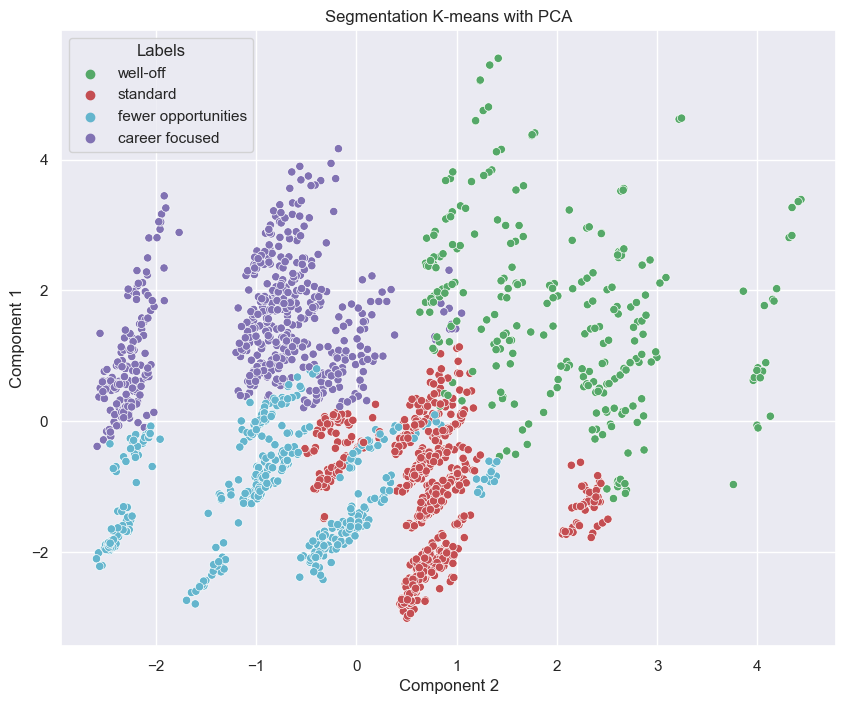

In [41]:
x_axis = customer_data_cluster_pca['Component 2']
y_axis = customer_data_cluster_pca['Component 1']
plt.figure(figsize = (10, 8))
sns.scatterplot(x=x_axis, y=y_axis,hue = customer_data_cluster_pca['Labels'], palette = ['g', 'r', 'c', 'm'])
plt.title('Segmentation K-means with PCA')
plt.show()

In [42]:
pickle.dump(scaler,open('scaler.pickle','wb'))

In [43]:
pickle.dump(pca,open('pca.pickle','wb'))

In [44]:
pickle.dump(kmeans_pca,open('kmeans_pca.pickel','wb'))